In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import env
import numpy as np
import pandas as pd
import os

# set columnns display format
pd.set_option('display.max_columns', None)

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    This function gets conncection to mySQL database
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [3]:
def new_data():
    '''
    This function reads the curriculum data from the mySQL database into a df.
    '''
    # Create SQL query.
    sql_query = '''
    SELECT 
        date,
        time,
        ip,
        path,
        user_id,
        cohort_id,
        name as cohort_name,
        slack,
        start_date,
        end_date,
        program_id
    FROM
        curriculum_logs.logs
    join
        curriculum_logs.cohorts on cohort_id = id
    ;
    '''
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('curriculum_logs'))
    
    return df

In [4]:
def get_data():
    '''
    This function reads in curriculum data from curriculum_log database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('curriculum.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('curriculum.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('curriculum.csv')
        
    return df


In [5]:
def prep_data(df):
    '''
    This function takes in a messy dataframe and return the cleaned verison of dataframe.
    Detial steps are in code comment below.
    '''
    # Change date columns to datetime
    df.date = pd.to_datetime(df.date)
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    # Set date columns as datatime as index
    df = df.set_index(df.date)

    # Drop null values
    df = df.dropna()

    # Encode program_id
    df['program'] = df.program_id.map({1: 'Full Stack PHP', 2: 'Full Stack Java', 3: 'Data Science', 4: 'Front End'})

    return df


In [6]:
df = get_data()

# Check the shape of our messy dataframe
df.shape
df = prep_data(df)

# Checking the shape of our cleaned dataframe
df.shape

(847329, 12)

## 1. 

In [7]:
#web
df.loc[~(df.cohort_name == 'Staff')] 
wd_cohorts = df.loc[df.program_id.isin([1, 2, 4])]
ds_cohorts = df.loc[df.program_id == 3]
remove_pages = [ 'index.html', 'search/search_index.json', 'mkdocs/search_index.json','/', 'toc', 'appendix',]
wd_cohorts = wd_cohorts.loc[~wd_cohorts.path.isin(remove_pages)]
wd_cohorts.page_viewed = wd_cohorts.path.replace('content/', '', regex=True)
wd_top_10_pages = wd_cohorts.path.value_counts().nlargest(10)
print(wd_top_10_pages)

path
javascript-i                                                                 18193
java-iii                                                                     13162
html-css                                                                     13111
java-ii                                                                      12173
spring                                                                       11877
jquery                                                                       11037
mysql                                                                        10602
java-i                                                                       10460
javascript-ii                                                                10290
javascript-i/introduction/working-with-data-types-operators-and-variables     7326
Name: count, dtype: int64


In [8]:
#ds
ds_cohorts = df.loc[df.program_id == 3]
remove_pages = ['/', 'toc', 'appendix', 'index.html', 'search/search_index.json', 'mkdocs/search_index.json']
ds_cohorts = ds_cohorts.loc[~ds_cohorts.path.isin(remove_pages)]
ds_cohorts.path = ds_cohorts.path.replace('content/', '', regex=True)
ds_top_10_pages = ds_cohorts.path.value_counts().nlargest(10)
print(ds_top_10_pages)

path
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
Name: count, dtype: int64


## 2. 

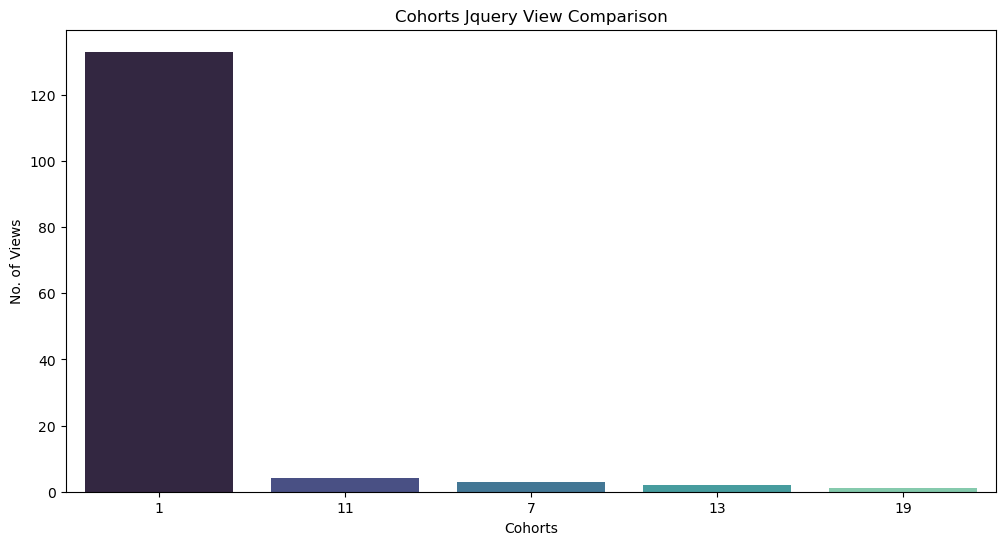

In [9]:
# full stack php
x = ['1', '11', '7', '13', '19']
y = [133, 4, 3, 2, 1]
fig = plt.figure(figsize = (12,6))
sns.barplot(x=x, y=y, palette ='mako')
plt.xlabel("Cohorts")
plt.ylabel("No. of Views")
plt.title("Cohorts Jquery View Comparison")
plt.show()

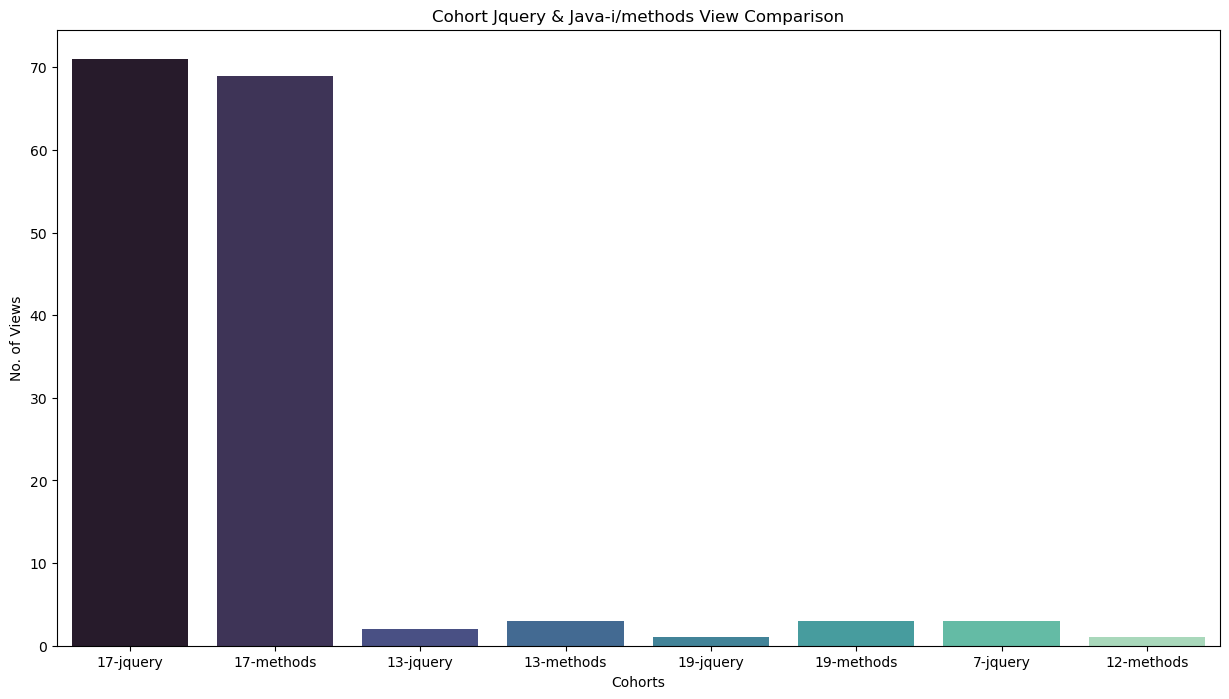

In [10]:
x = ['17-jquery', '17-methods', '13-jquery', '13-methods', '19-jquery', '19-methods', '7-jquery', '12-methods']
y = [71, 69, 2, 3, 1, 3, 3, 1]
fig = plt.figure(figsize = (15, 8))
sns.barplot(x=x, y=y, palette='mako')
plt.xlabel("Cohorts")
plt.ylabel("No. of Views")
plt.title("Cohort Jquery & Java-i/methods View Comparison")
plt.show()

## 3. 

In [11]:
pd.DataFrame([[940, 138, 'Neptune', 'Full Stack Java'], [918, 138, 'Neptune', 'Full Stack Java'],
    [879, 135, 'Macro', 'Full Stack Java'], [619, 57, 'Ganymede', 'Full Stack Java']], columns = ['User_id', 'Cohort_id', 'Cohort_name', 'Program'])

,User_id,Cohort_id,Cohort_name,Program
0,940,138,Neptune,Full Stack Java
1,918,138,Neptune,Full Stack Java
2,879,135,Macro,Full Stack Java
3,619,57,Ganymede,Full Stack Java


## 4. 

<AxesSubplot:title={'center':'IP Address Amount per User Distribution'}, ylabel='Density'>

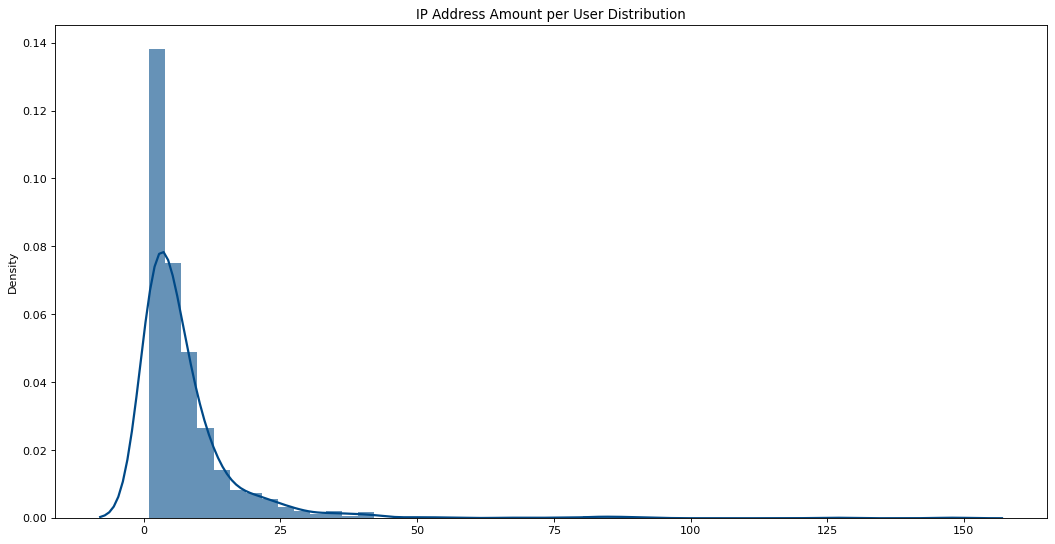

In [12]:
ip = pd.DataFrame(df.groupby('user_id').ip.nunique(), columns = ['ip'])
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(16,8), dpi= 80)
plt.title('IP Address Amount per User Distribution')
sns.distplot(x=ip['ip'], **kwargs, color = '#004987')

In [13]:
ip = pd.DataFrame(df.groupby('user_id').ip.nunique(), columns = ['ip'])
q1 = ip['ip'].quantile(0.25)
q3 = ip['ip'].quantile(0.75)
iqr = q3-q1
upper_bound = q3 + 3*iqr
print('The upper bound of IP address amount is: ', upper_bound)

The upper bound of IP address amount is:  30.0


Text(0.5, 1.0, 'User 228 Activity Over Time')

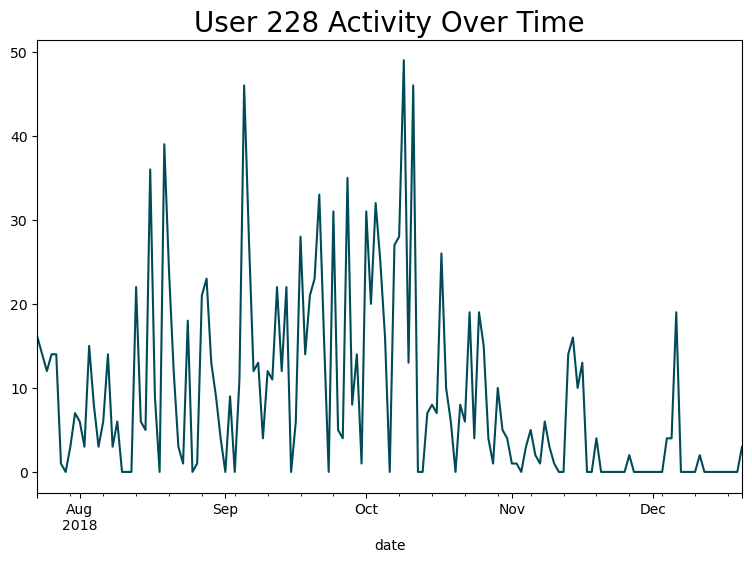

In [14]:
plt.figure(figsize = (20,20))
plt.subplot(321)
pages_228 = df[df.user_id == 228]['path'].resample('d').count()
pages_228.plot(color = '#004B57')
plt.title('User 228 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 843 Activity Over Time')

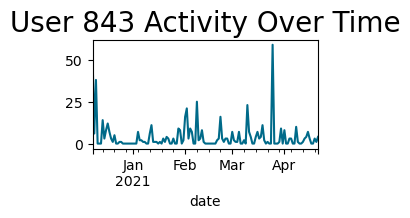

In [15]:
plt.subplot(322)
pages_843 = df[df.user_id == 843]['path'].resample('d').count()
pages_843.plot(color = '#006A89')
plt.title('User 843 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 690 Activity Over Time')

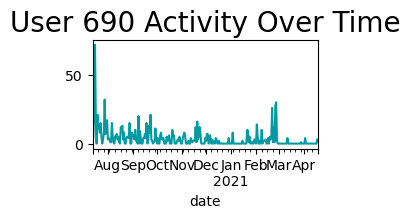

In [16]:
plt.subplot(323)
pages_690 = df[df.user_id == 690]['path'].resample('d').count()
pages_690.plot(color = '#009AA2')
plt.title('User 690 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 533 Activity Over Time')

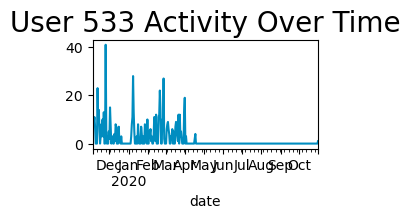

In [17]:
plt.subplot(324)
pages_533 = df[df.user_id == 533]['path'].resample('d').count()
pages_533.plot(color = '#008DC0')
plt.title('User 533 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 226 Activity Over Time')

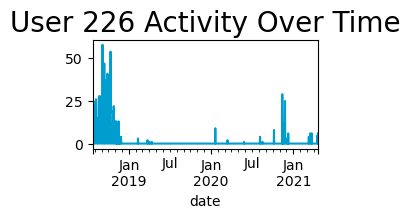

In [18]:
plt.subplot(325)
pages_226 = df[df.user_id == 226]['path'].resample('d').count()
pages_226.plot(color = '#009DCF')
plt.title('User 226 Activity Over Time', fontsize = 20)


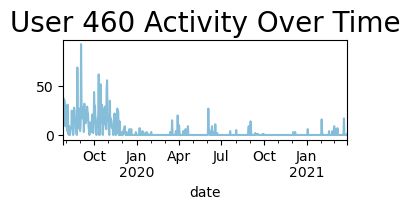

In [19]:
plt.subplot(326)
pages_460 = df[df.user_id == 460]['path'].resample('d').count()
pages_460.plot(color = '#86BEDA')
plt.title('User 460 Activity Over Time', fontsize = 20)
plt.tight_layout()


In [20]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    pages_per_user = df['path'].resample('d').count()
    return pages_per_user


In [21]:
def compute_pct_b(pages_per_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_per_user.ewm(span=span).mean()
    stdev = pages_per_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_per_user, midband, bb], axis=1)
    my_df.columns = ['pages_per_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_per_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [22]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_per_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()


In [23]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_per_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_per_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]


Text(0.5, 1.0, 'User 341 Activity Over Time')

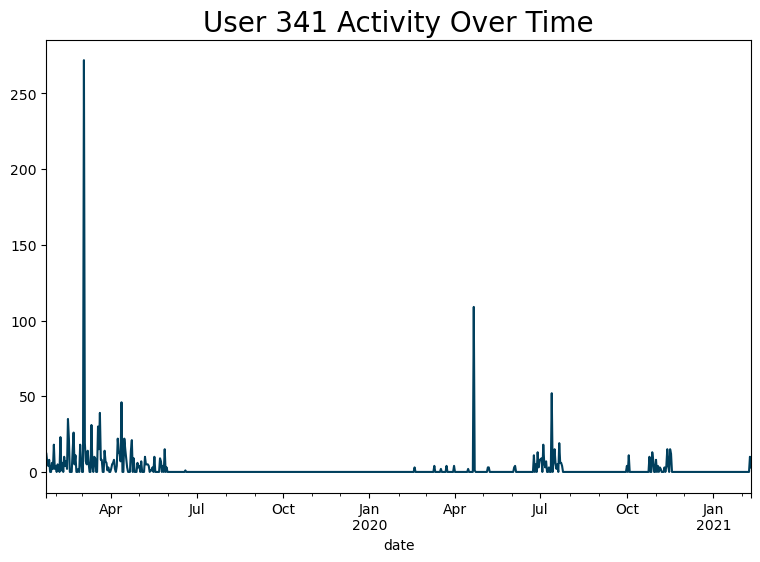

In [24]:
plt.figure(figsize = (20,20))
plt.subplot(321)
df_341 = one_user_df_prep(df, 341)
df_341.plot(color = '#003F5D')
plt.title('User 341 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 341 Activity Over Time')

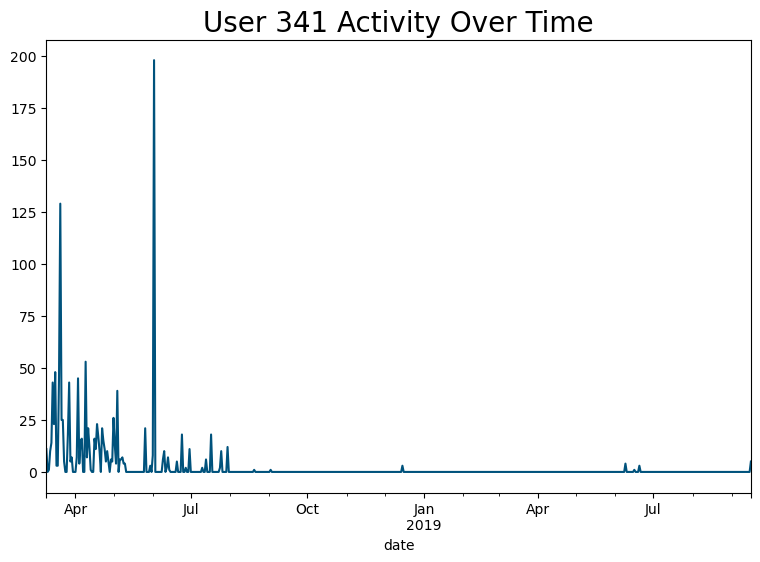

In [25]:
plt.figure(figsize = (20,20))
plt.subplot(322)
df_138 = one_user_df_prep(df,138)
df_138.plot(color = '#00527C')
plt.title('User 341 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 526 Activity Over Time')

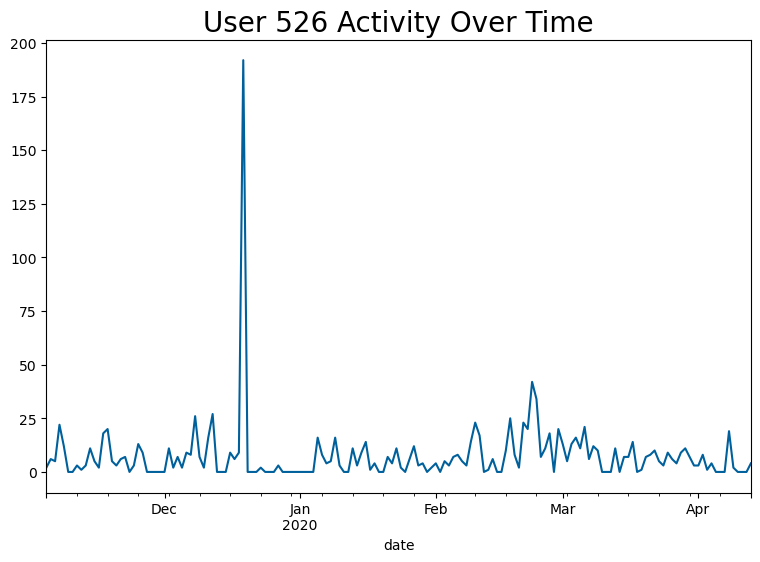

In [26]:
plt.figure(figsize = (20,20))
plt.subplot(323)
df_526 = one_user_df_prep(df,526)
df_526.plot(color = '#00609C')
plt.title('User 526 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 658 Activity Over Time')

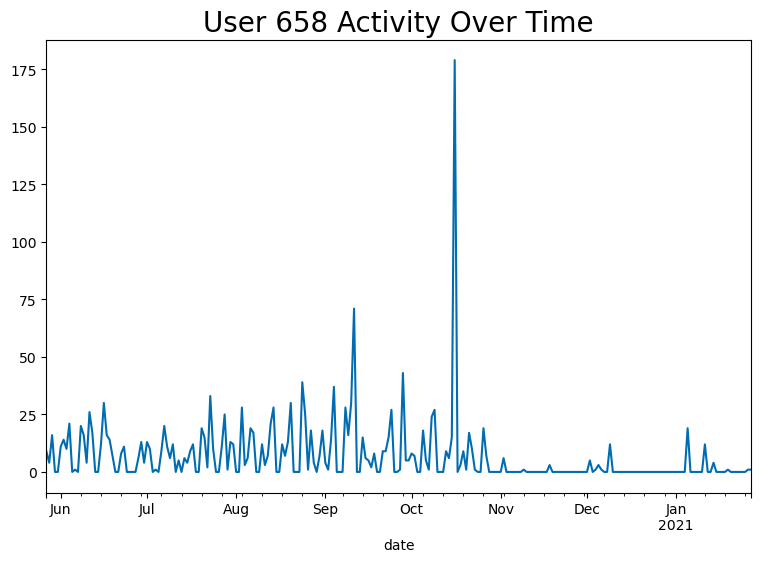

In [27]:
plt.figure(figsize = (20,20))
plt.subplot(324)
df_658 = one_user_df_prep(df,658)
df_658.plot(color = '#006DB2')
plt.title('User 658 Activity Over Time', fontsize = 20)


Text(0.5, 1.0, 'User 521 Activity Over Time')

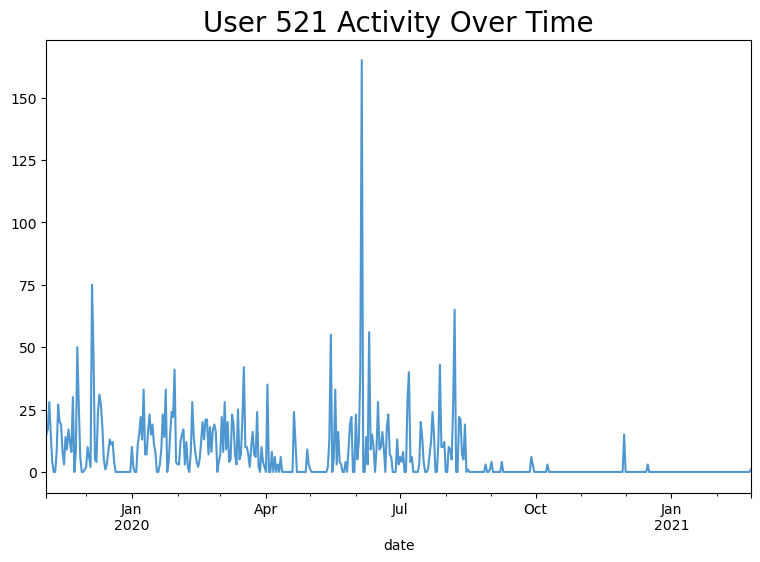

In [28]:
plt.figure(figsize = (20,20))
plt.subplot(325)
df_521 = one_user_df_prep(df,521)
df_521.plot(color = '#4E97D1')
plt.title('User 521 Activity Over Time', fontsize = 20)


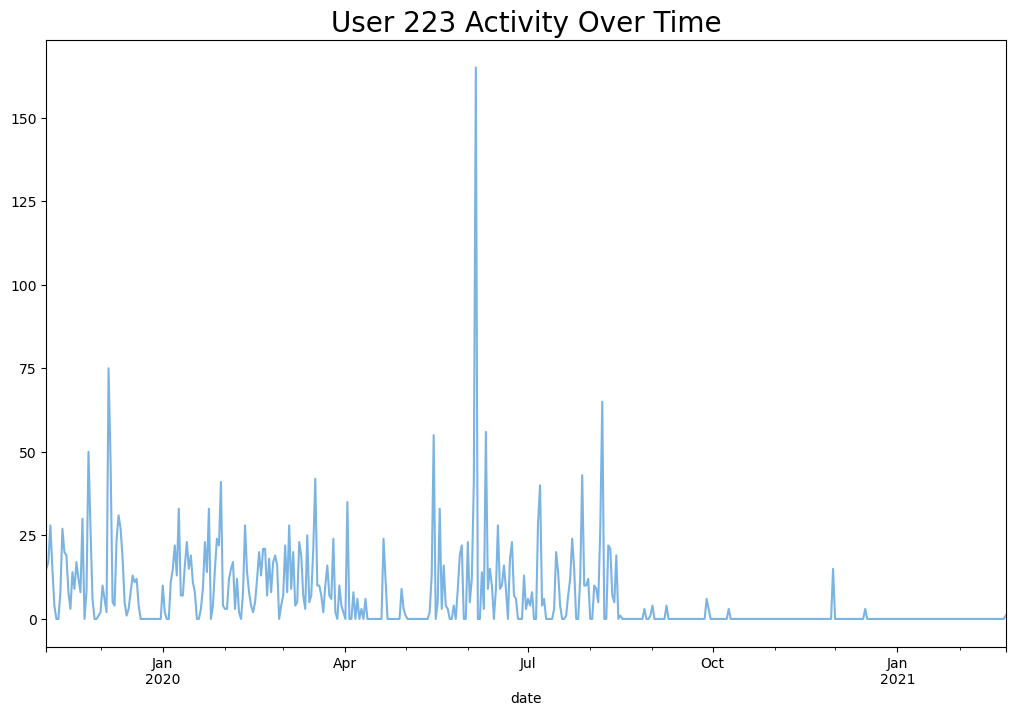

In [29]:
plt.figure(figsize = (20,20))
plt.subplot(326)
df_223 = one_user_df_prep(df,521)
df_223.plot(color = '#7BB4E3')
plt.title('User 223 Activity Over Time', fontsize = 20)
plt.tight_layout()


## 5. 

In [30]:
def q5(df):
    ds = df[df.program_id == 3]
    wd1 = df[df.program_id == 1]
    wd2 = df[df.program_id == 2]
    wd = pd.concat([wd1, wd2])
    return ds, wd
ds, wd = q5(df)

<AxesSubplot:title={'center':'Data Science Student Access to Web Devlopment Curriculum'}, xlabel='date'>

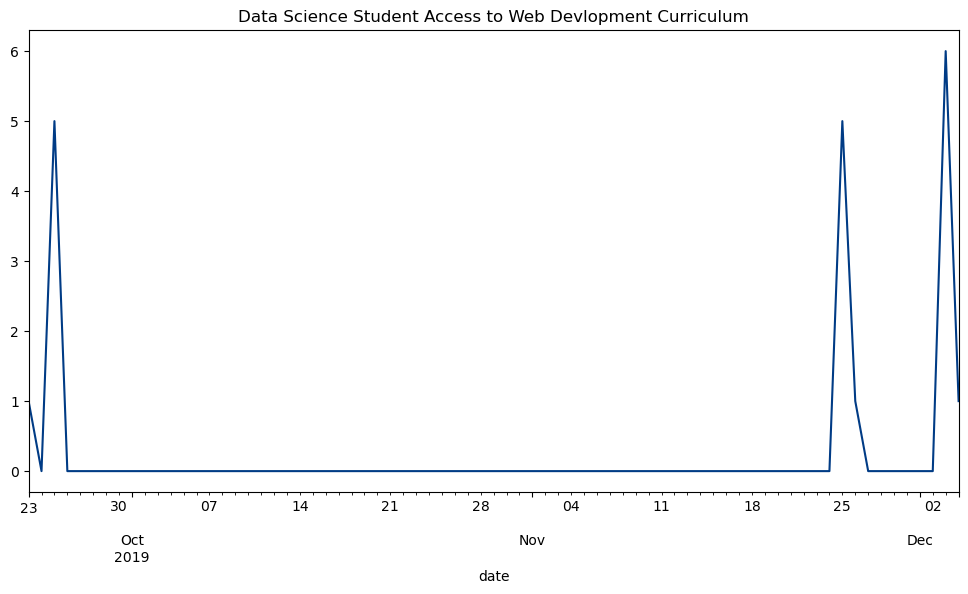

In [31]:
ds_pages = ds[(ds['path'] == 'java-i') | (ds['path'] == 'java-ii') | (ds['path'] == 'java-ii') | (ds['path'] == 'java-iii') | (ds['path'] == 'jquery')]['path'].resample('d').count()
plt.figure(figsize = (12,6))
ds_pages.plot(title='Data Science Student Access to Web Devlopment Curriculum', color = '#003B85')

<AxesSubplot:title={'center':'Web Development Student Access to Data Science Curriculum'}, xlabel='date'>

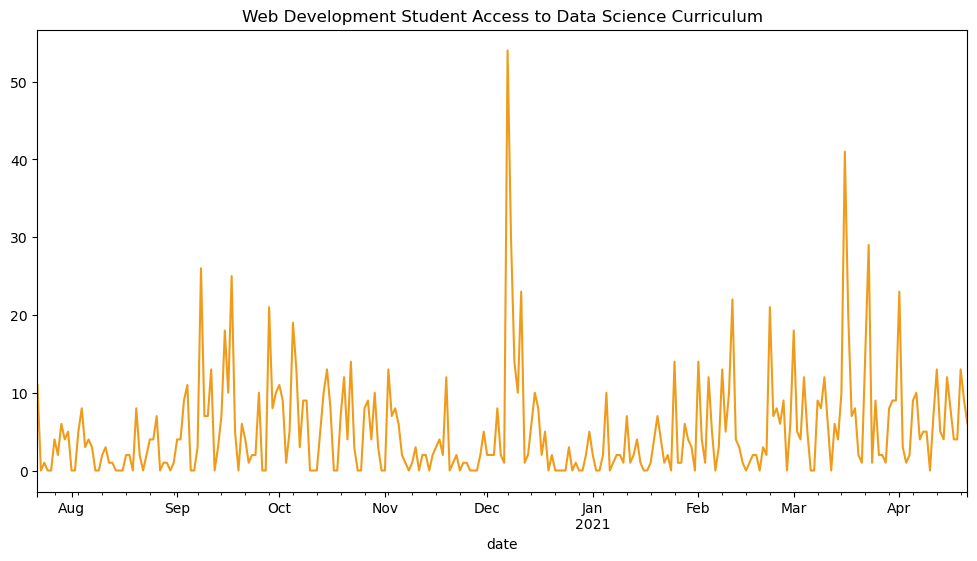

In [32]:
wd_pages = wd[(wd['path'] == 'classification/overview') | (wd['path'] == 'fundamentals/intro-to-data-science') | (wd['path'] == 'stats/compare-means')]['path'].resample('d').count()
plt.figure(figsize = (12,6))
wd_pages.plot(title='Web Development Student Access to Data Science Curriculum', color = '#f09c1a')

## 6. 

Text(0, 0.5, 'No. of Log Entry')

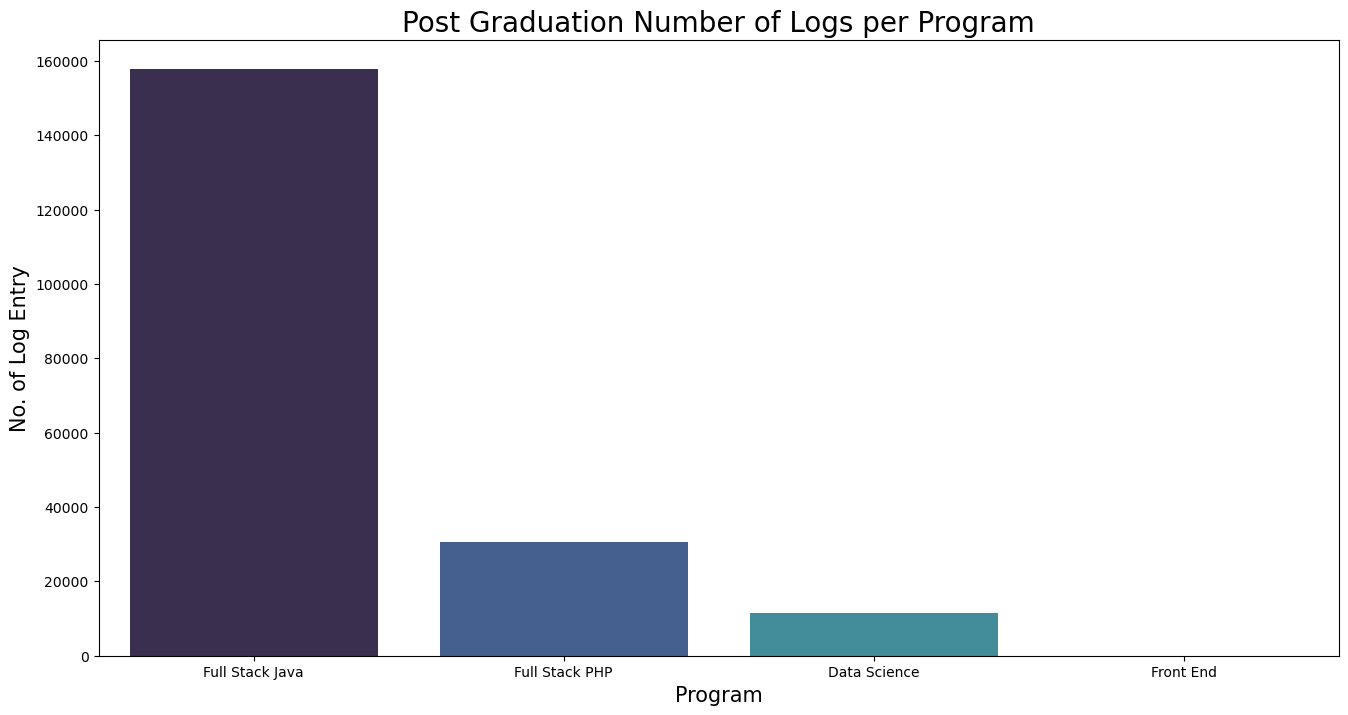

In [33]:
grads = pd.DataFrame(df[df.date>df.end_date].program.value_counts())
grads = grads.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x=grads['program'], y=grads['count'],palette = 'mako')
plt.title('Post Graduation Number of Logs per Program', fontsize = 20)
plt.xlabel('Program', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

Text(0, 0.5, 'Topics')

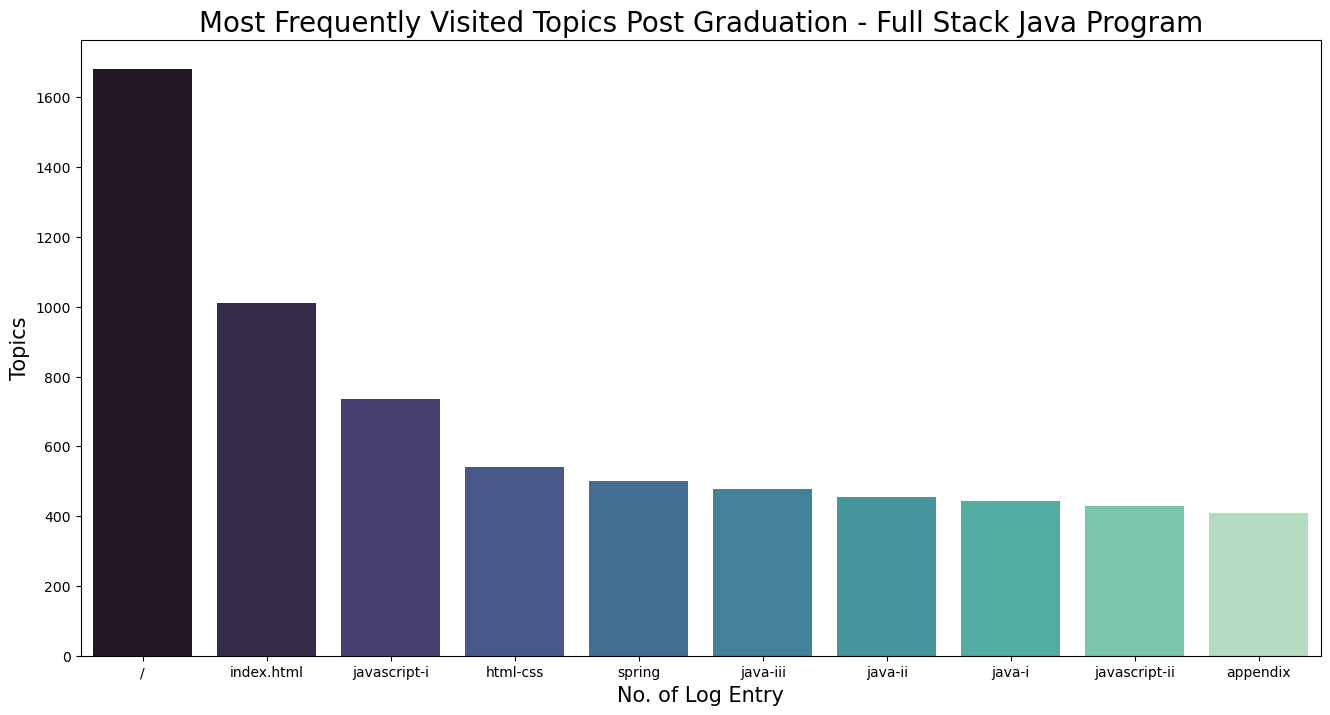

In [34]:
p1 = pd.DataFrame(df[(df.date>df.end_date)&(df.program_id == 1)].path.value_counts().head(10))
p1 = p1.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x=p1['path'], y=p1['count'],palette = 'mako')
plt.title('Most Frequently Visited Topics Post Graduation - Full Stack Java Program', fontsize = 20)
plt.xlabel('No. of Log Entry', fontsize = 15)
plt.ylabel('Topics', fontsize = 15)

Text(0, 0.5, 'No. of Log Entry')

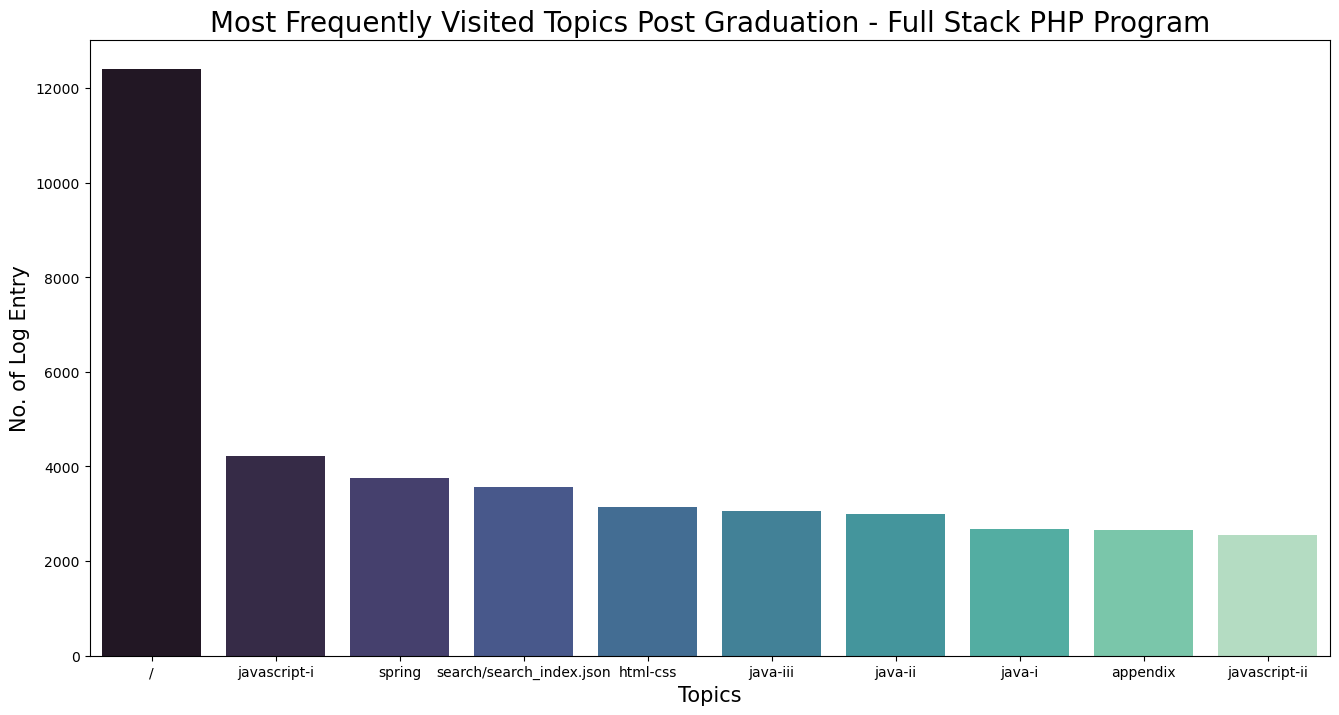

In [35]:
p2 = pd.DataFrame(df[(df.date>df.end_date)&(df.program_id == 2)].path.value_counts().head(10))
p2 = p2.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x=p2['path'], y=p2['count'],palette = 'mako')
plt.title('Most Frequently Visited Topics Post Graduation - Full Stack PHP Program', fontsize = 20)
plt.xlabel('Topics', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

Text(0, 0.5, 'No. of Log Entry')

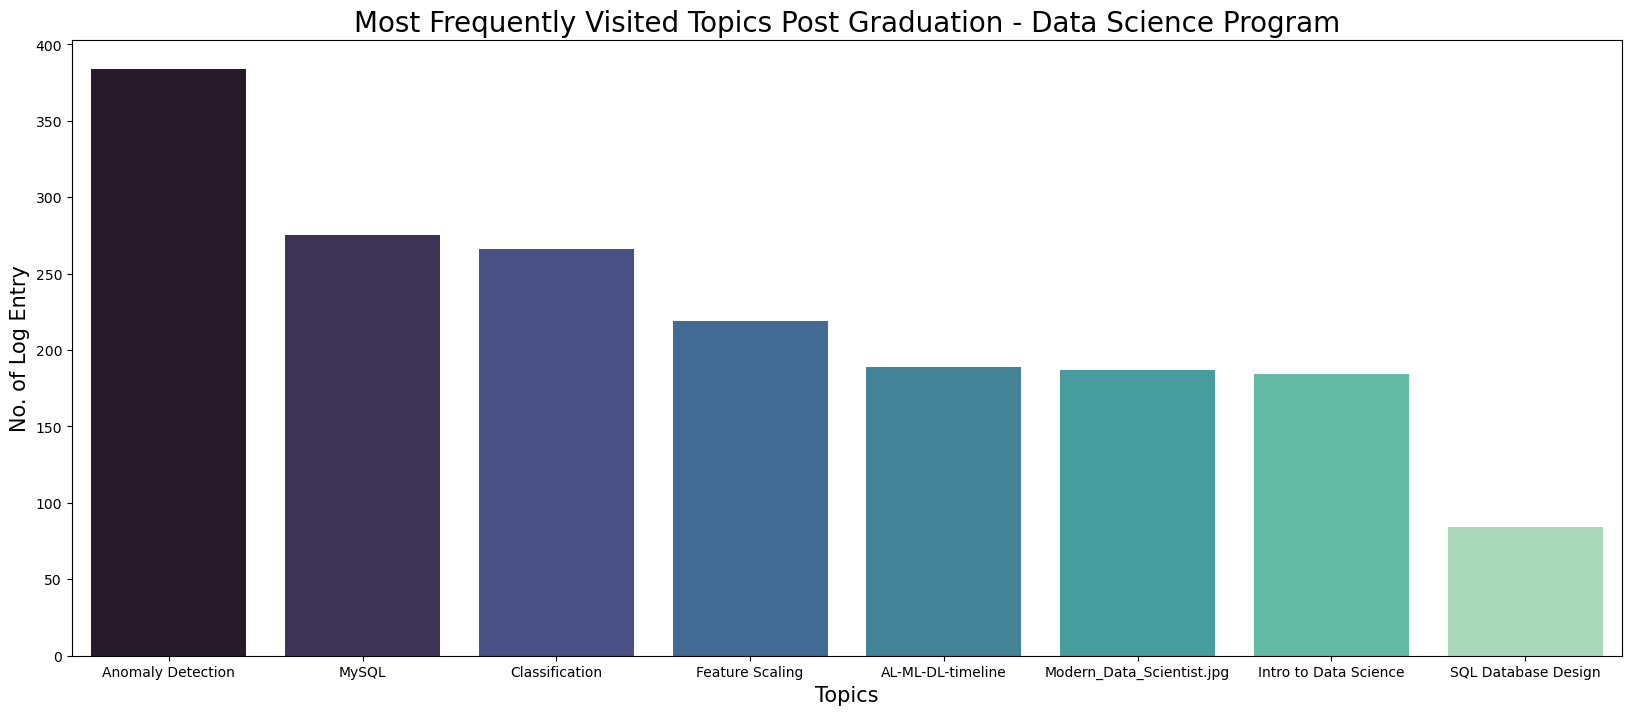

In [36]:
p3 = pd.DataFrame([ ['Anomaly Detection', 384],['MySQL', 275], ['Classification', 266], ['Feature Scaling', 219],
    ['AL-ML-DL-timeline', 189], ['Modern_Data_Scientist.jpg', 187], ['Intro to Data Science', 184], ['SQL Database Design', 84]], columns = ['Lesson', 'Count'])
plt.figure(figsize=(20,8))
sns.barplot(x=p3['Lesson'], y=p3['Count'],palette = 'mako')
plt.title('Most Frequently Visited Topics Post Graduation - Data Science Program', fontsize = 20)
plt.xlabel('Topics', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

Text(0, 0.5, 'No. of Log Entry')

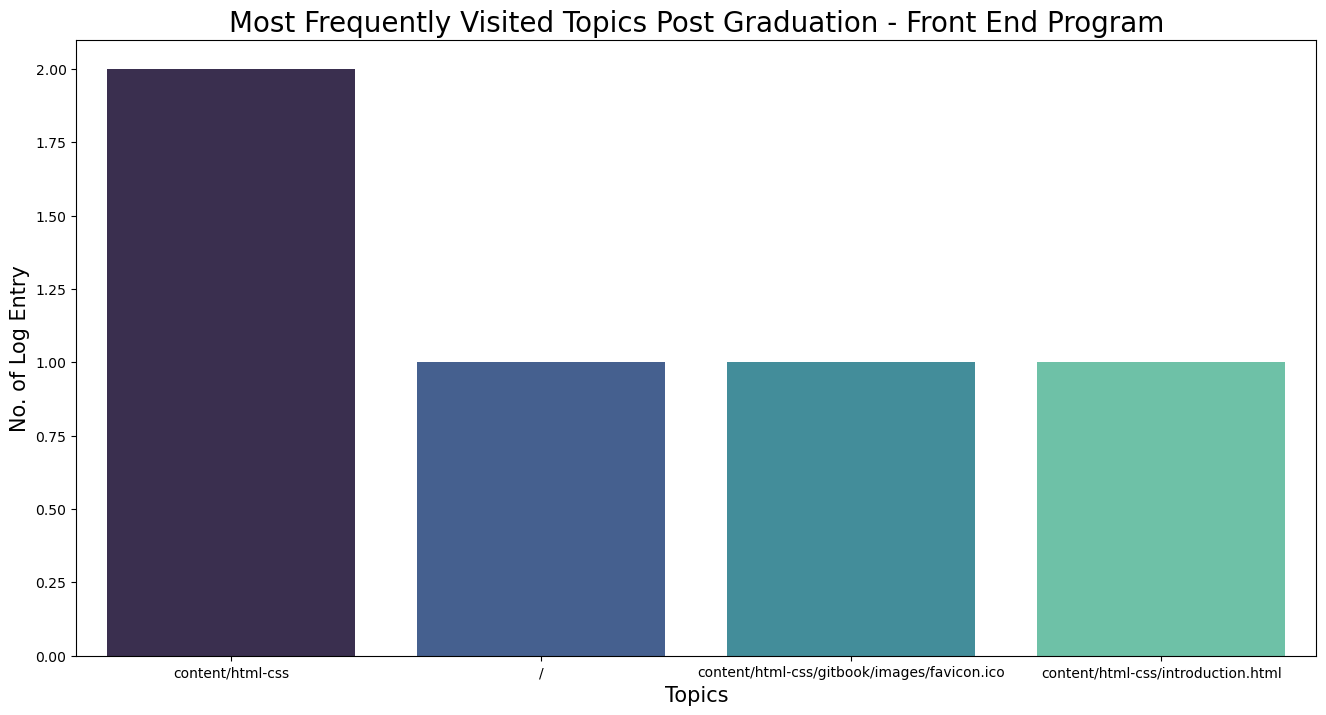

In [37]:
p4 = pd.DataFrame(df[(df.date>df.end_date)&(df.program_id == 4)].path.value_counts().head())
p4 = p4.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x=p4['path'], y=p4['count'],palette = 'mako')
plt.title('Most Frequently Visited Topics Post Graduation - Front End Program', fontsize = 20)
plt.xlabel('Topics', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

## 7. 

Text(0, 0.5, 'No. of Log Entry')

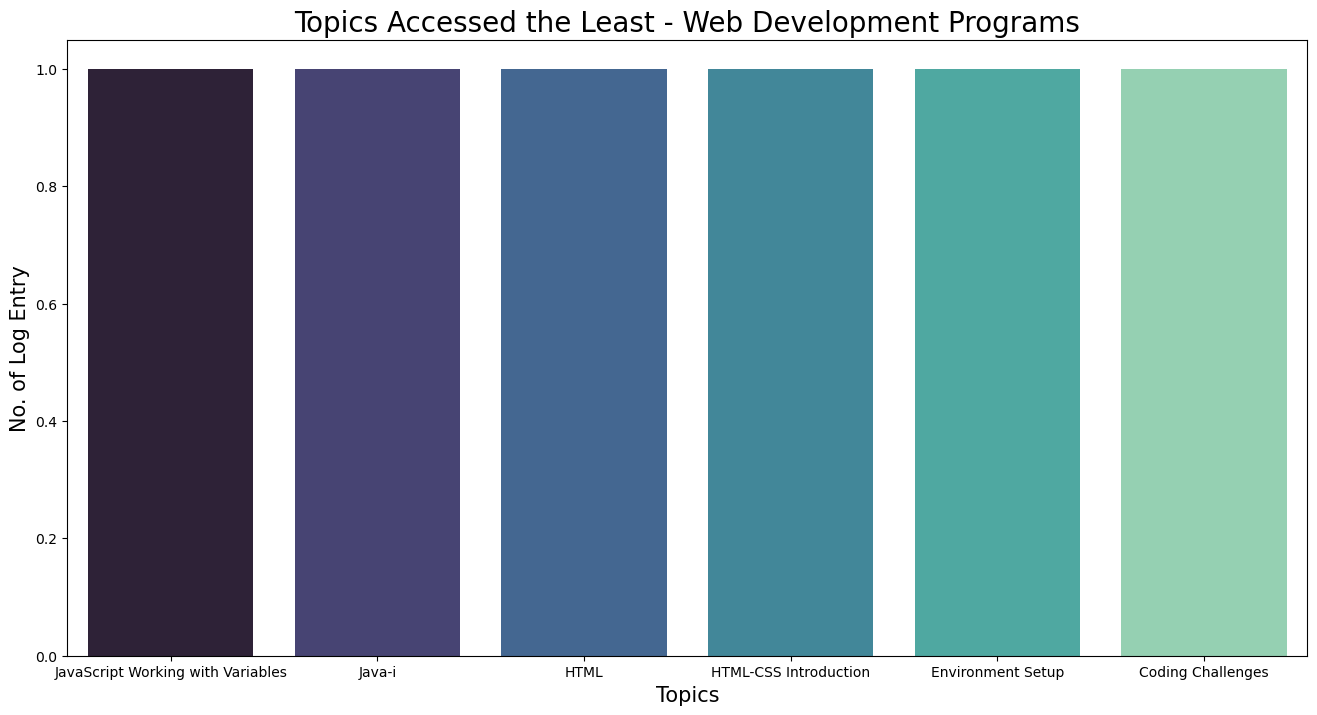

In [38]:
wb_plot = pd.DataFrame([['JavaScript Working with Variables', 1], ['Java-i', 1], ['HTML', 1], ['HTML-CSS Introduction', 1], ['Environment Setup', 1], ['Coding Challenges', 1]], columns = ['Lesson', 'Count'])
plt.figure(figsize=(16,8))
sns.barplot(x=wb_plot['Lesson'], y=wb_plot['Count'],palette = 'mako')
plt.title('Topics Accessed the Least - Web Development Programs', fontsize = 20)
plt.xlabel('Topics', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

Text(0, 0.5, 'No. of Log Entry')

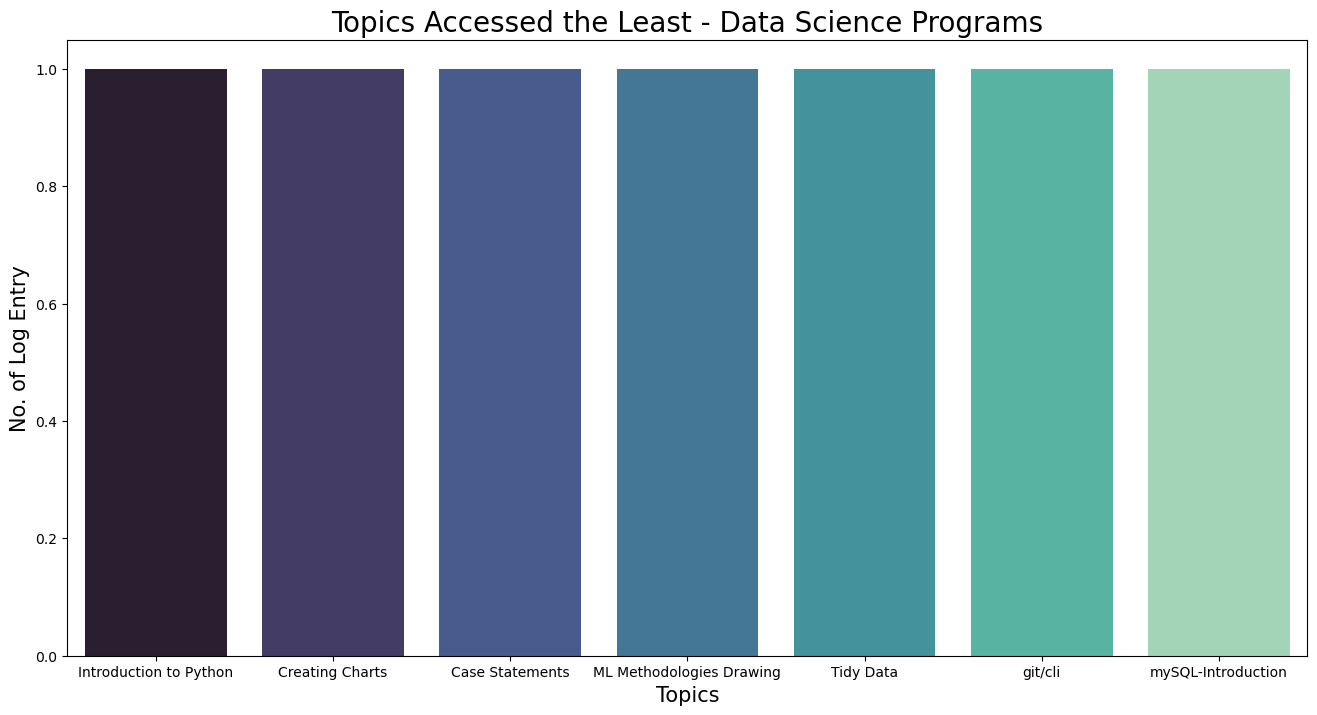

In [39]:
ds_plot = pd.DataFrame([['Introduction to Python', 1], ['Creating Charts',1], ['Case Statements', 1], ['ML Methodologies Drawing', 1], ['Tidy Data', 1], ['git/cli', 1], ['mySQL-Introduction', 1]], columns = ['Lesson', 'Count'])
plt.figure(figsize=(16,8))
sns.barplot(x=ds_plot['Lesson'], y=ds_plot['Count'],palette = 'mako')
plt.title('Topics Accessed the Least - Data Science Programs', fontsize = 20)
plt.xlabel('Topics', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)